In [12]:
# Import Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl

In [13]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Import data set.
df = pd.read_pickle(r'C:\Users\steph\OneDrive\Documents\Sept 2022 Worl University Rankings\02 Data\Prepared Data\Rankings_w_category.pkl')

In [7]:
# Examine data set.
df.shape

(2200, 14)

In [4]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,number_of_students,patents,score,year,world_rank_category_loc
0,986,University of Bucharest,Romania,1,237,567,218,845,804,645,871,44.04,2015,High Rank
1,962,University of Puerto Rico at Mayagüez,Puerto Rico,1,367,567,218,998,793,645,871,44.06,2015,High Rank
2,950,United Arab Emirates University,United Arab Emirates,1,367,521,218,994,851,812,689,44.08,2015,High Rank
3,928,University of Cyprus,Cyprus,1,367,567,218,820,896,645,816,44.10,2015,High Rank
4,93,University of Copenhagen,Denmark,1,101,101,60,85,66,101,101,44.15,2012,Low Rank


In [25]:
# Drop categorical columns.
df.drop(columns =['institution', 'country', 'world_rank_category_loc'], axis=1, inplace=True)

In [26]:
# Verify column removal. 
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,number_of_students,patents,score,year
0,986,1,237,567,218,845,804,645,871,44.04,2015
1,962,1,367,567,218,998,793,645,871,44.06,2015
2,950,1,367,521,218,994,851,812,689,44.08,2015
3,928,1,367,567,218,820,896,645,816,44.10,2015
4,93,1,101,101,60,85,66,101,101,44.15,2012


In [27]:
df.dtypes

world_rank                int64
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
number_of_students        int64
patents                   int64
score                   float64
year                      int64
dtype: object

In [28]:
# Standardize data.
object = StandardScaler()
object.fit_transform(df)

array([[ 1.73017923, -0.7593052 , -0.31253607, ...,  1.59765945,
        -0.48438909,  0.89482498],
       [ 1.65129704, -0.7593052 ,  0.75384724, ...,  1.59765945,
        -0.48181145,  0.89482498],
       [ 1.61185595, -0.7593052 ,  0.75384724, ...,  0.93326643,
        -0.47923381,  0.89482498],
       ...,
       [ 1.52311348,  3.62893966,  0.65541186, ..., -0.34806296,
        -0.44185806, -0.41758499],
       [ 1.56584133,  3.64827114,  0.75384724, ...,  0.21046524,
        -0.47794499,  0.89482498],
       [ 1.67430434,  3.64827114,  0.65541186, ...,  1.10849097,
        -0.4508798 , -0.41758499]])

In [29]:
# The Elbow Technique.
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [30]:
# Create a score that represents the rate of variation.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [31]:
score

[-1052112205.778763,
 -414796087.2113473,
 -297896033.2937003,
 -254421862.35843876,
 -227836121.73935005,
 -210346609.08985388,
 -194510022.06684092,
 -183189874.19152066,
 -173697401.27732736]

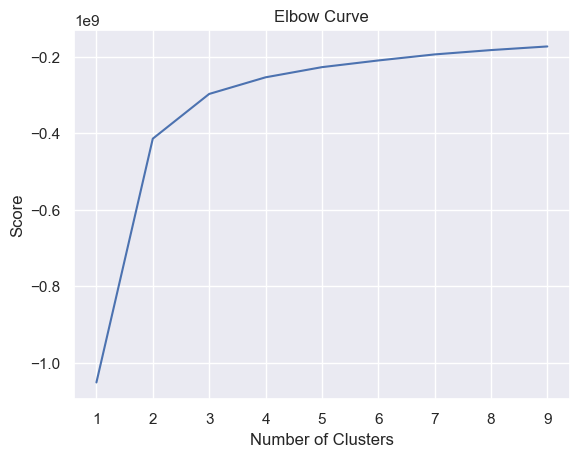

In [32]:
# Plot the elbow curve.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Discussing the Elbow Curve
The curve shows the "elbow" at three clusters, where it then rises much slower. This indicates the best cluster count for this algorithm is 3.  

In [36]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [37]:
# Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3)

In [38]:
# Create column "clusters" in data set.
df['clusters'] = kmeans.fit_predict(df)

In [39]:
# Verify new column
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,number_of_students,patents,score,year,clusters
0,986,1,237,567,218,845,804,645,871,44.04,2015,0
1,962,1,367,567,218,998,793,645,871,44.06,2015,0
2,950,1,367,521,218,994,851,812,689,44.08,2015,0
3,928,1,367,567,218,820,896,645,816,44.10,2015,0
4,93,1,101,101,60,85,66,101,101,44.15,2012,2


In [40]:
df['clusters'].value_counts()

0    805
2    701
1    694
Name: clusters, dtype: int64

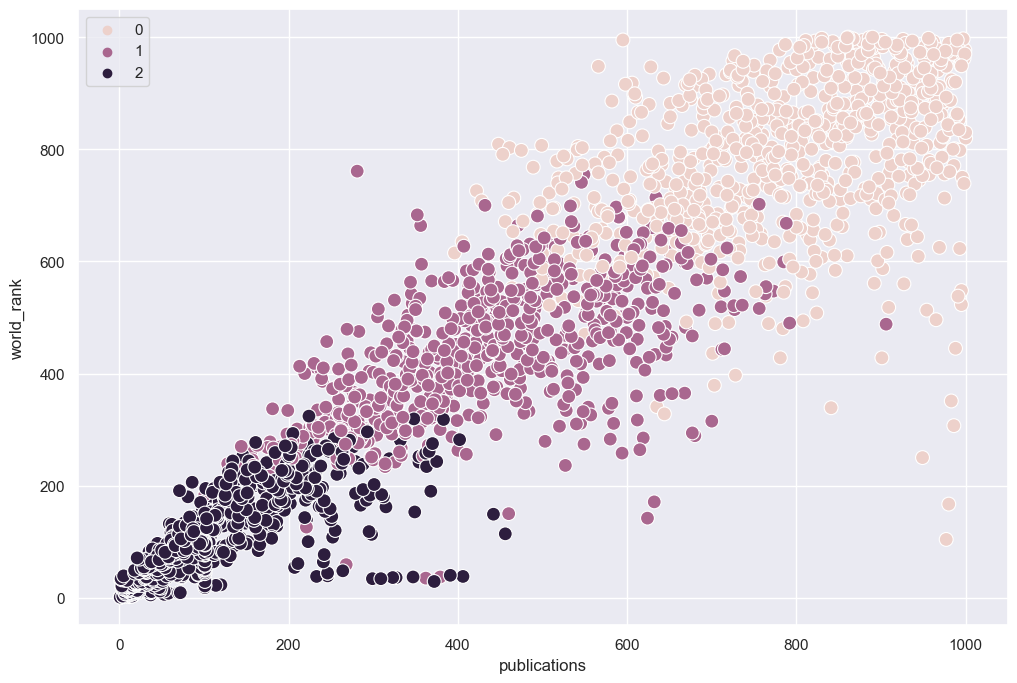

In [41]:
# Plot the clusters for "publications" and 'world_rank'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['publications'], y=df['world_rank'], hue=kmeans.labels_, s=100)

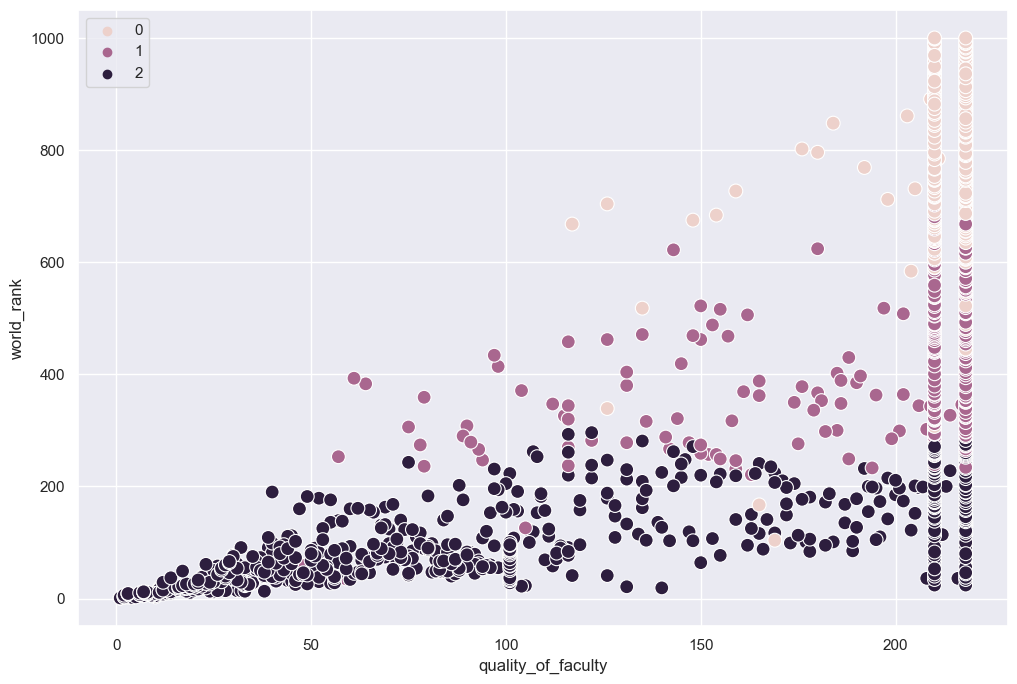

In [42]:
# Plot the clusters for "quality_of_faculty" and 'world_rank'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['quality_of_faculty'], y=df['world_rank'], hue=kmeans.labels_, s=100)

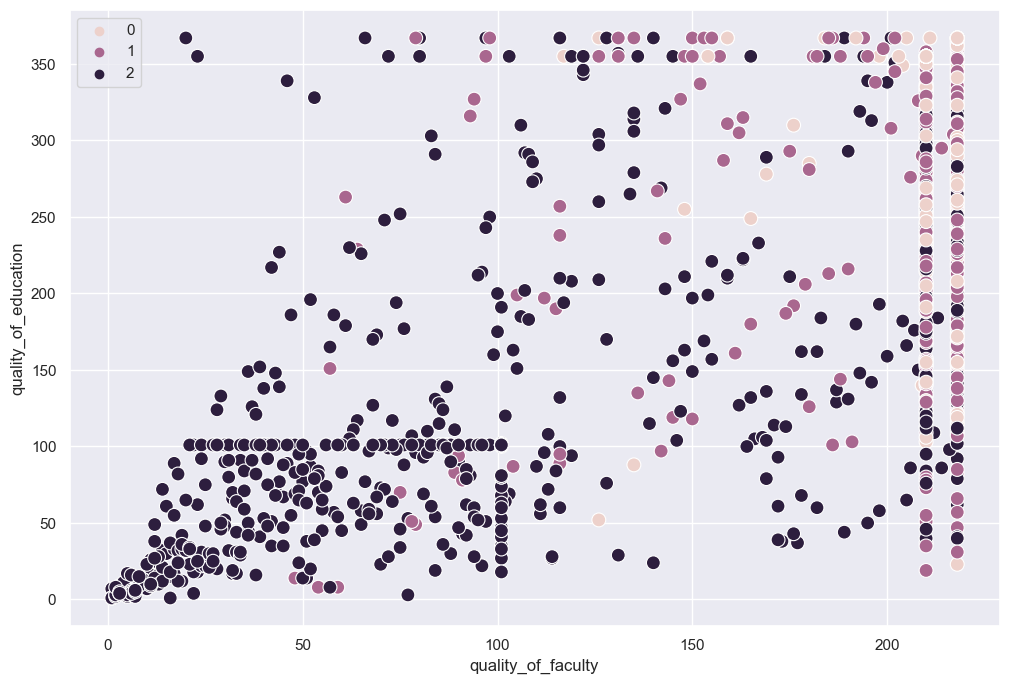

In [44]:
# Plot the clusters for "quality_of_faculty" and 'quality_of_education'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['quality_of_faculty'], y=df['quality_of_education'], hue=kmeans.labels_, s=100)

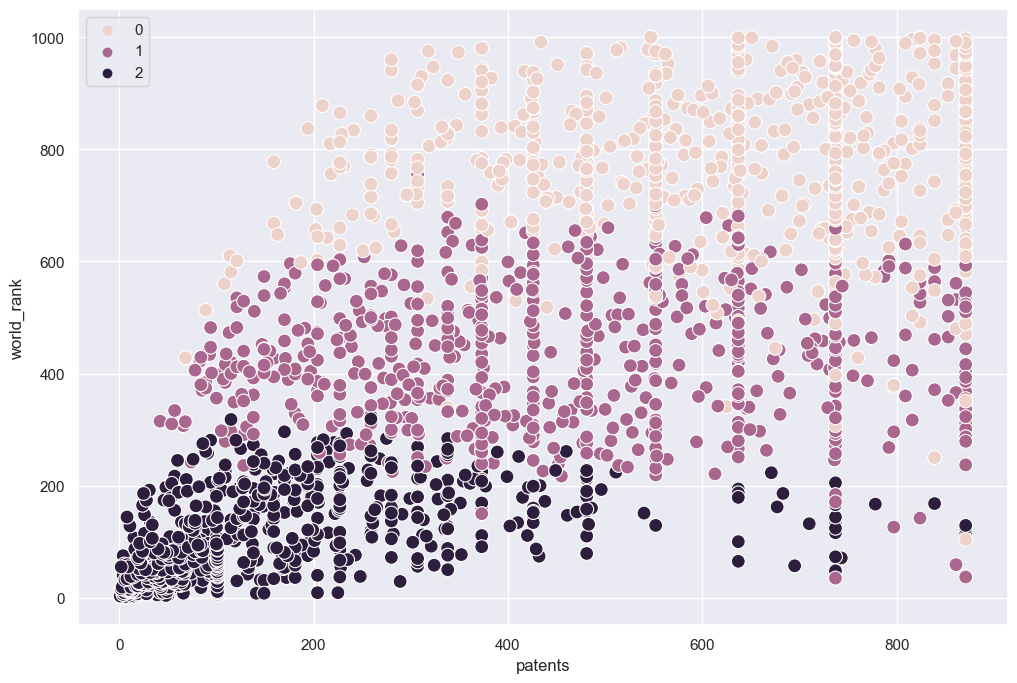

In [45]:
# Plot the clusters for "patents" and 'world_rank'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['patents'], y=df['world_rank'], hue=kmeans.labels_, s=100)

# Discussing the plots
publications and world rank plot: As expected previous exercises, it is clear more publications mean a higher world rank. With the exception of only a few, the more publications equals a higher rank.
quality of faculty and world rank plot: Again, as seen previously, while I had thought there would be more of a connection with these variables, there is not. 
quality of faculty and quality of education plot: This plot really doesn't make sense, and isn't useful for our purposes. I had thought there would be a definite connections here, but there is not.
patents and world rank plot: Previous exercises had shown a positive relationship and that is the case per the plot. The data points are very layered.

In [46]:
# Preparing descriptive statistics for clusters
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [48]:
df.groupby('cluster').agg({'publications':['mean', 'median'], 
                         'world_rank':['mean', 'median'], 
                         'quality_of_education':['mean', 'median'],
                          'quality_of_faculty':['mean', 'median'],
                           'patents':['mean', 'median']})

publications         world_rank        quality_of_education  \
                    mean median        mean median                 mean   
cluster                                                                   
dark purple   114.706134   97.0  107.763195   89.0           152.586305   
pink          784.593789  799.0  788.027329  799.0           343.927950   
purple        431.976945  424.5  434.000000  430.5           319.014409   

                   quality_of_faculty            patents         
            median               mean median        mean median  
cluster                                                          
dark purple  101.0         113.473609  101.0  161.002853  101.0  
pink         355.0         213.089441  211.0  635.581366  697.0  
purple       355.0         205.291066  210.0  473.855908  481.0

# Discussing the statistics
The pink cluster has the highest stats by far. The quality of the faculty and the quality of education really don't seem to play a big part in the rankings. As found in the regression study, the top contributor is publications. I suspect influence will show the same. That might be another area to explore. 